In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

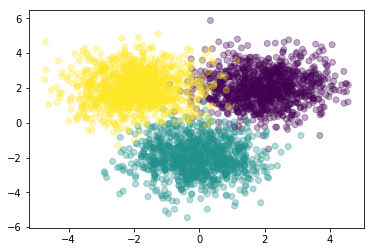

In [2]:
D = 2
K = 3
N = int(K*1e3)

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure()
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.3333)

In [3]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]] = 1
        
    return Y

def shuffle(*args):
    idx = np.random.permutation(len(args[0]))
    return [X[idx] for X in args]

def ReLU(H):
    return H*(H > 0)

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

def feed_forward(X,W1,b1,W2,b2):
    Z1 = ReLU(np.matmul(X,W1) + b1)
    P_hat = softmax(np.matmul(Z1,W2) + b2)
    return Z1, P_hat
    
def cross_entropy(Y, P_hat):
    return -np.sum(Y*np.log(P_hat))

def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [4]:
Y = one_hot_encode(y)

In [19]:
M = 6

W1_0 = np.random.randn(D,M)
b1_0 = np.random.randn(M)
W2_0 = np.random.randn(M,K)
b2_0 = np.random.randn(K)

In [20]:
W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

eta = 1e-4
epochs = int(1e2)
J = np.zeros(epochs)

for epoch in range(epochs):
    Z1, P_hat = feed_forward(X,W1,b1,W2,b2)
    J[epoch] = cross_entropy(Y,P_hat)
    
    dH2 = P_hat - Y
    dW2 = np.matmul(Z1.T,dH2)
    W2 -= eta*dW2
    b2 -= eta*dH2.sum(axis = 0)
    
    dZ1 = np.matmul(dH2,W2.T)
    dH1 = dZ1*(Z1 > 0)
    dW1 = np.matmul(X.T,dH1)
    W1 -= eta*dW1
    b1 -= eta*dH1.sum(axis = 0)

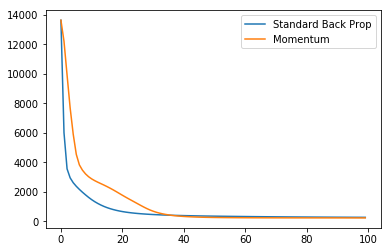

In [21]:
W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J_m = np.zeros(epochs)

eta = 1e-5
mu = 0.9

vW1 = 0
vb1 = 0
vW2 = 0
vb2 = 0

for epoch in range(epochs):
    Z1, P_hat = feed_forward(X,W1,b1,W2,b2)
    J_m[epoch] = cross_entropy(Y,P_hat)
    
    dH2 = P_hat - Y
    dW2 = np.matmul(Z1.T,dH2)
    db2 = dH2.sum(axis = 0)
    vW2 = mu*vW2 - eta*dW2
    vb2 = mu*vb2 - eta*db2
    W2 += vW2
    b2 += vb2
    
    dZ1 = np.matmul(dH2,W2.T)
    dH1 = dZ1*(Z1 > 0)
    dW1 = np.matmul(X.T,dH1)
    db1 = dH1.sum(axis = 0)
    vW1 = mu*vW1 - eta*dW1
    vb1 = mu*vb1 - eta*db1
    W1 += vW1
    b1 += vb1
    
plt.figure()
plt.plot(J, label = "Standard Back Prop")
plt.plot(J_m, label = "Momentum")
plt.legend()